In [95]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import least_squares
from scipy.optimize import fmin


In [24]:
file=pd.read_csv(r'Data\5L_532_600_50x_0_80 NIR_100_500_25%_2.txt', delimiter='\t', header=None, names=['x',  'Intensity'] )

file=file[file['x']>1000]
file=file[file['x']<2000]
file=file.reset_index()


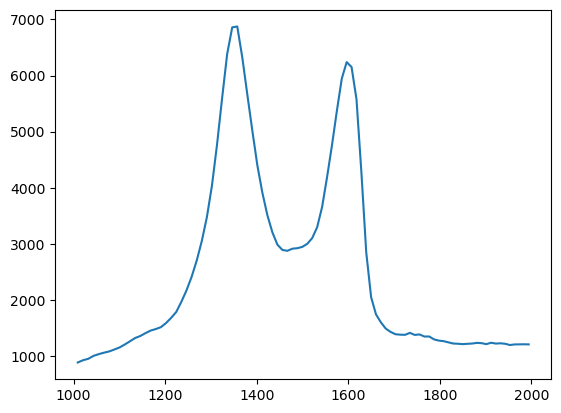

In [25]:
plt.plot(file['x'], file['Intensity'])

[ 3.31583523e-01  1.59049867e+03  6.17092647e-01 -2.98999934e+01
  1.05907771e+03 -2.23457162e-01  5.32988167e+01]


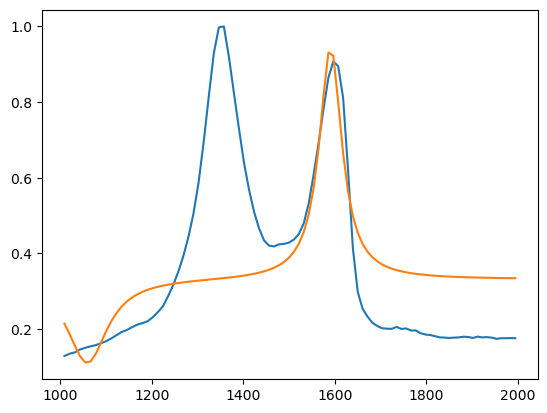

In [111]:
help_=[1598,1346]

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    assert not ( len( paramsRest ) % 3 )
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )

def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

xData=file['x']
yData=file['Intensity']
yData = yData / max(yData)

generalWidth = 1

yDataLoc = yData
startValues = [ max( yData ) ]
counter = 0

while max( yDataLoc ) - min( yDataLoc ) > .1:
    counter += 1
    if counter > 2: ### max 20 peak...emergency break to avoid infinite loop
        #print('lc')
        break
    minP = np.argmin( yDataLoc )
    minY = yData[ minP ]
    

    if counter<len(help_):
        x0=help_[counter-1]
    else:
        x0 = xData[ minP ]
    #print('lc1')
    startValues += [ x0, minY - max( yDataLoc ), generalWidth ]
    popt, ier = leastsq( res_multi_lorentz, startValues, args=( xData, yData ))
    yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]

print (popt)
testData = [ multi_lorentz(x, popt ) for x in xData ]

fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()

[ 8.91228590e-01  1.35186667e+03  7.91212701e-01 -4.95685367e+01
  9.17980322e+02 -6.47511664e-01  6.73050584e+02  1.62529474e+03
 -5.51568865e+00  5.49327716e+01  1.97188310e+03 -5.38256114e-01
  5.65915119e+02  1.62086239e+03  6.00895805e+00  5.48556683e+01]


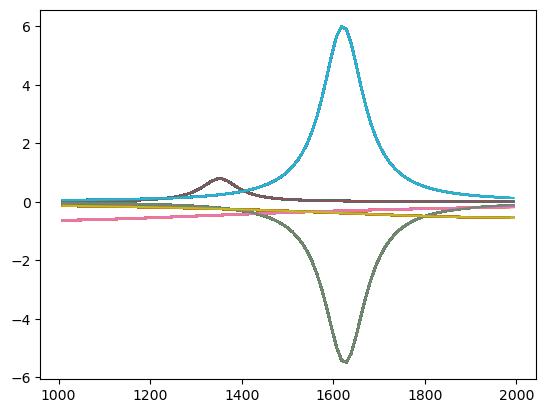

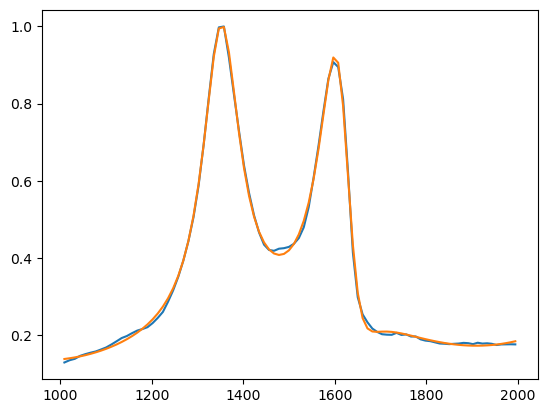

In [86]:
functions={}

totel=[]

class Lorentzian_function:
    generalWidth=1

    def __init__(self, x0, minY, yDataLoc):
        self.x0=x0
        self.minY=minY
        self.yDataLoc=yDataLoc

def CreateLorentzianFunctions(n, x0, minY, yDataLoc):
    global functions
    for index_1 in range (n):
        functions['clss'+str(index_1)]=Lorentzian_function(x0, minY, yDataLoc)
#CreateLorentzianFunctions(4, x0, minY, yDataLoc)

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    #assert not ( len( paramsRest ) % 3 )
    params_verf= [  paramsRest] 
    totel.append(paramsRest)
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )


lista={}
for index in range (5):
    lista[index]={}
    lista[index]['x']=[]
    lista[index]['y']=[]


def multi_lorentz2( x, params ):
    off = params[0]
    paramsRest = params[1:]
    #assert not ( len( paramsRest ) % 3 )
    params_verf= [  paramsRest] 
    totel.append(paramsRest)
    #return_data=off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )
    i=0
    var_number=len(totel)
    #print(var_number)
    

    while i<(len(paramsRest)):
        return_data=lorentzian( x, paramsRest[i], paramsRest[i+1], paramsRest[i+2])
        #print(x)
        #print(return_data)
        if not (x in lista[0]['x']):
            lista[0]['x'].append(x)
            lista[0]['y'].append(return_data)
        else:
            if not (x in lista[1]['x']):
                lista[1]['x'].append(x)
                lista[1]['y'].append(return_data)
            else:
                if not (x in lista[2]['x']):
                    lista[2]['x'].append(x)
                    lista[2]['y'].append(return_data)
                else:
                    if not (x in lista[3]['x']):
                        lista[3]['x'].append(x)
                        lista[3]['y'].append(return_data)
                    else:
                        if not (x in lista[4]['x']):
                            lista[4]['x'].append(x)
                            lista[4]['y'].append(return_data)


                

        i=i+3
        #fig1=plt.figure()
        plt.plot(lista[0]['x'],lista[0]['y'])
        #fig1=plt.figure()
        plt.plot(lista[1]['x'],lista[1]['y'])
        plt.plot(lista[2]['x'],lista[2]['y'])
        plt.plot(lista[3]['x'],lista[3]['y'])
        plt.plot(lista[4]['x'],lista[4]['y'])
        #print(lista)
    return_data=return_data+off
    #plt.plot(x, return_data)
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )



def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

xData=file['x']
yData=file['Intensity']
yData = yData / max(yData)

generalWidth = 1

yDataLoc = yData
startValues = [ max( yData ) ]
counter = 0
poptl=[]
#print(max( yDataLoc ) - min( yDataLoc ))

while max( yDataLoc ) - min( yDataLoc ) > .1:
    counter += 1
    if counter < 20: ### max 20 peak...emergency break to avoid infinite loop
        break
    minP = np.argmin( yDataLoc )
    minY = yData[ minP ]
    if counter<len(help_):
        x0=help_[counter-1]
    else:
        x0 = xData[ minP ]
    functions['clss'+str(counter-1)].x0=x0
    functions['clss'+str(counter-1)].minY=minY
    functions['clss'+str(counter-1)].yDataLoc=yDataLoc
    startValues += [ x0, minY - max( yDataLoc ), generalWidth ]
    popt, ier = leastsq( res_multi_lorentz, startValues, args=( xData, yData ) )
    yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]
    poptl.append(popt)

print (popt)


testData = [ multi_lorentz2(x, popt ) for x in xData ]

fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()

In [63]:
lorentz_indv_data

NameError: name 'lorentz_indv_data' is not defined

In [84]:
totel[-1]

array([ 1.35186667e+03,  7.91212701e-01, -4.95685367e+01,  9.17980322e+02,
       -6.47511664e-01,  6.73050584e+02,  1.62529474e+03, -5.51568865e+00,
        5.49327716e+01,  1.97188310e+03, -5.38256114e-01,  5.65915119e+02,
        1.62086239e+03,  6.00895805e+00,  5.48556683e+01])

In [39]:
xx1=lorentzian(xData, totel[-1][0],totel[-1][1],totel[-1][2])
xx2=lorentzian(xData, totel[-1][3],totel[-1][4],totel[-1][5])
xx3=lorentzian(xData, totel[-1][6],totel[-1][7],totel[-1][8])
xx4=lorentzian(xData, totel[-1][9],totel[-1][10],totel[-1][11])

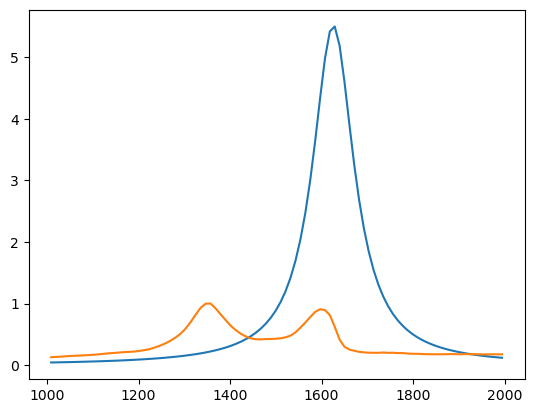

In [47]:
suma=min(yData)+min(xx3)
plt.plot(xData, -xx3)
plt.plot(xData, yData)

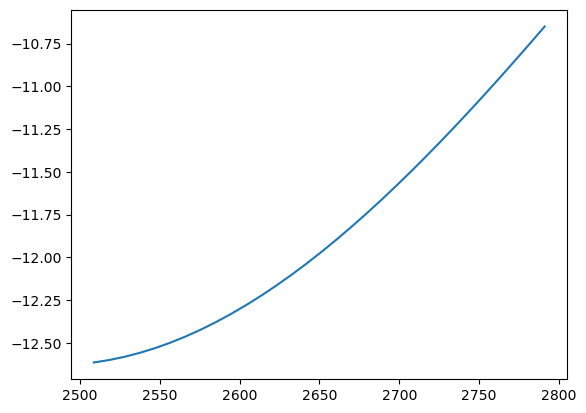

In [ ]:
plt.plot(xData,xx1)

In [ ]:
poptl

[array([ 1.01199780e+00,  2.53071906e+03, -4.23533310e-01,  8.03047624e+01]),
 array([ 1.33996477e+01,  2.48339187e+03, -1.26296820e+01,  7.13623113e+02,
         2.81763901e+03, -1.96073376e+00,  1.02576958e+02])]

In [ ]:
testData = multi_lorentz(xData, [poptl[1][3],poptl[1][4],poptl[1][5],poptl[1][6]])

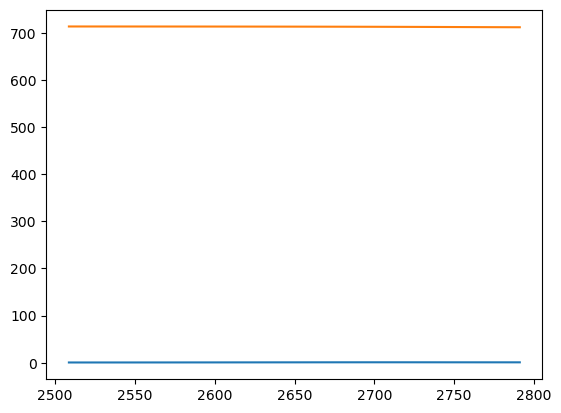

In [ ]:
fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()

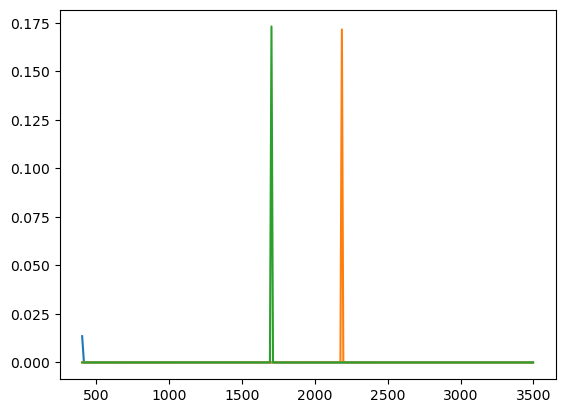

In [ ]:
#plt.plot(xData, yData)
for index_1 in range (3):   
    plt.plot(xData, lorentzian(xData, functions['clss'+str(index_1)].x0, functions['clss'+str(index_1)].minY, pd.Series(functions['clss'+str(index_1)].yDataLoc)))


In [ ]:
functions['clss1'].x0

2145.85

In [ ]:
CreateLorentzianFunctions(4, x0, minY, yDataLoc)

In [ ]:
type(functions['clss0'].yDataLoc)

pandas.core.series.Series

In [ ]:
popt[:3]

array([9.75151584e-01, 1.35370823e+03, 7.56979110e-01])

In [ ]:
plt.plot(xData, lorentzian(xData, functions['clss1'].x0, functions['clss1'].minY, functions['clss1'].yDataLoc))

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [ ]:
list(file['x'])[0]

2508.63